#Задание

Используя шаблон ноутбука для распознавания видов одежды и аксессуаров из набора **fashion_mnist**, выполните следующие действия:

1. Создайте **9** моделей нейронной сети с различными архитектурами и сравните в них значения точности на проверочной выборке (на последней эпохе) и на тестовой выборке.  Используйте следующее деление: обучающая выборка - **50000** примеров, проверочная выборка - **10000** примеров, тестовая выборка - **10000** примеров.

2. Создайте сравнительную таблицу в конце ноутбука, напишите свои выводы по результатам проведенных тестов.

# Шаблон ноутбука

##Импорт библиотек

In [2]:
# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization

# Утилиты для to_categorical()
from tensorflow.keras import utils

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam, Adadelta

# Библиотека для работы с массивами
import numpy as np

# Библиотека для работы с таблицами
import pandas as pd

# Отрисовка графиков
import matplotlib.pyplot as plt

# Связь с google-диском
from google.colab import files

# Предварительная обработка данных
from sklearn import preprocessing

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Для загрузки датасета
from keras.datasets import fashion_mnist

# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

##Описание базы

###База: одежда, обувь и аксессуары
- Датасет состоит из набора изображений одежды, обуви, аксессуаров и их классов.
- Изображения одного вида хранятся в numpy-массиве **(28, 28)** - **x_train, x_test**.
- База содержит **10** классов: (Футболка, Брюки, Пуловер, Платье, Пальто, Сандалии/Босоножки, Рубашка, Кроссовки, Сумочка, Ботильоны) - **y_train, y_test**.
- Примеров: train - **60000**, test - **10000**.

###Вывод примеров

In [3]:
# Загрузка датасета
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Вывод размерностей выборок

print('Размер x_train:',x_train.shape)
print('Размер y_train:',y_train.shape)
print('Размер x_test:',x_test.shape)
print('Размер y_test:',y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Размер x_train: (60000, 28, 28)
Размер y_train: (60000,)
Размер x_test: (10000, 28, 28)
Размер y_test: (10000,)


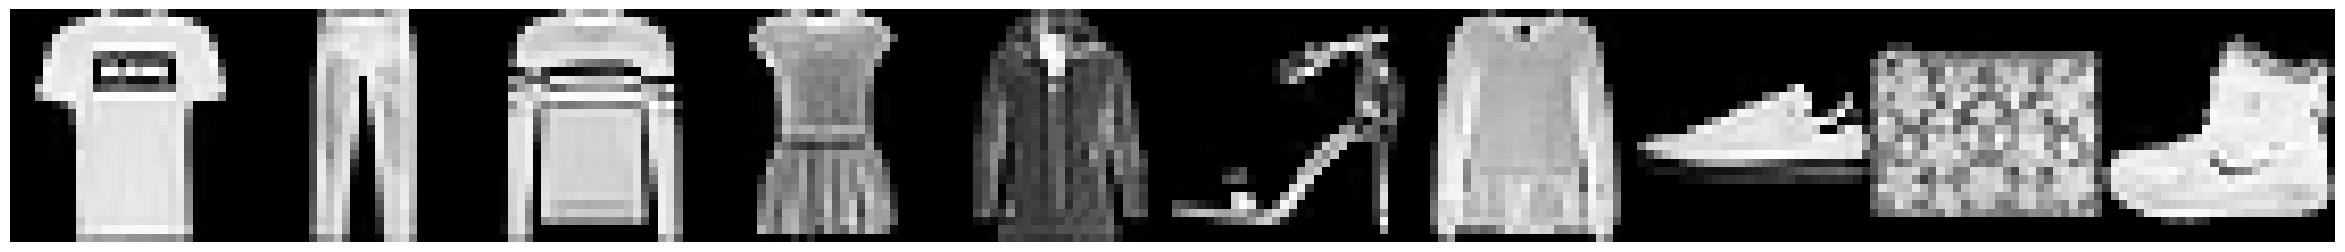

In [4]:
# Выбор 1 изображения каждого класса
imgs = np.array([x_train[y_train==i][0] for i in range(10)])

# Соединение изображения в одну линию
imgs = np.concatenate(imgs, axis=1)

# Создание поля для изображения
plt.figure(figsize=(30, 6))

# Отрисовка итогового изображения
plt.imshow(imgs, cmap='Greys_r')

# Без сетки
plt.grid(False)

# Без осей
plt.axis('off')

# Вывод результата
plt.show()

In [5]:
# Изменение формы входных картинок с 28х28 на 784
# первая ось остается без изменения, остальные складываются в вектор
x_train_r = x_train.reshape(x_train.shape[0], -1)
# Проверка результата
print(f'Форма обучающих данных: {x_train.shape} -> {x_train_r.shape}')

Форма обучающих данных: (60000, 28, 28) -> (60000, 784)


In [6]:
# Нормализация входных картинок
# Преобразование x_train_r в тип float32 (числа с плавающей точкой) и нормализация
x_train_r = x_train_r.astype('float32') / 255.

In [7]:
CLASS_COUNT = 10
y_train_r = utils.to_categorical(y_train, CLASS_COUNT)
# Вывод формы y_train_r
# 300 примеров, каждый длины 3 по числу классов
print(y_train_r.shape)

(60000, 10)


# Архитектура 1

In [8]:
#Архитектура 1

# Создание модели
model = Sequential()

model.add(Dense(60, input_dim=784, activation='relu'))
model.add(Dense(30))
model.add(Activation('relu'))
model.add(Dense(10, activation='sigmoid'))

# Компиляция и возврат модели
model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 60)             │        47,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,240 (192.34 KB)

 Trainable params: 49,240 (192.34 KB)

 Non-trainable params: 0 (0.00 B)

None


In [9]:
# Обучение нейронной сети
history = model.fit(x_train_r,
                    y_train_r,
                    batch_size=8,
                    epochs=14,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7677 - loss: 0.6567 - val_accuracy: 0.8419 - val_loss: 0.4347
Epoch 2/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8528 - loss: 0.3955 - val_accuracy: 0.8584 - val_loss: 0.3922
Epoch 3/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8678 - loss: 0.3594 - val_accuracy: 0.8692 - val_loss: 0.3700
Epoch 4/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8791 - loss: 0.3307 - val_accuracy: 0.8660 - val_loss: 0.3615
Epoch 5/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8845 - loss: 0.3112 - val_accuracy: 0.8767 - val_loss: 0.3424
Epoch 6/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8866 - loss: 0.2986 - val_accuracy: 0.8736 - val_loss: 0.3571
Epoch 7/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8921 - loss: 0.2855 - val_accuracy: 0.8802 - val_loss: 0.3409
Epoch 8/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8960 - loss: 0

In [10]:
#Оценка качества
# первая ось остается без изменения, остальные складываются в вектор
x_test_r = x_test.reshape(x_test.shape[0], -1)
y_test_r = utils.to_categorical(y_test, CLASS_COUNT)
scores = model.evaluate(x_test_r,
                        y_test_r,
                        verbose=1
                        )
print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6422 - loss: 68.0736
Процент верных ответов на тестовых данных: 64.0 %


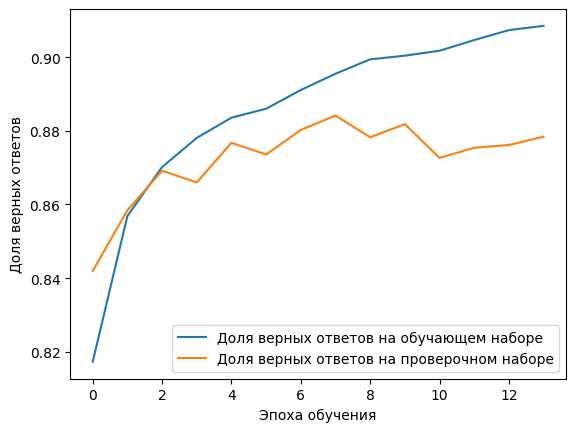

In [11]:
#Визуализация качества обучения
# Визуализация точности на обучающей выборке

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')

# Визуализация точности на проверочной выборке
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенды
plt.legend()

# Вывод графика
plt.show()

# Архитектура 2

In [12]:
#Архитектура 2
model_2 = Sequential()

model_2.add(Dense(60, input_dim=784, activation='relu'))
model_2.add(Dense(30))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(30))
model_2.add(Activation('relu'))
model_2.add(Dense(10, activation='sigmoid'))

# Компиляция и возврат модели
model_2.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

# Вывод структуры модели
print(model_2.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 60)             │        47,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,170 (195.98 KB)

 Trainable params: 50,170 (195.98 KB)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
# Обучение нейронной сети
history_2 = model_2.fit(x_train_r,
                    y_train_r,
                    batch_size=8,
                    epochs=14,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.6807 - loss: 0.8692 - val_accuracy: 0.8305 - val_loss: 0.4694
Epoch 2/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8234 - loss: 0.4949 - val_accuracy: 0.8528 - val_loss: 0.4065
Epoch 3/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8437 - loss: 0.4311 - val_accuracy: 0.8667 - val_loss: 0.3748
Epoch 4/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8551 - loss: 0.4074 - val_accuracy: 0.8597 - val_loss: 0.3816
Epoch 5/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8630 - loss: 0.3834 - val_accuracy: 0.8729 - val_loss: 0.3586
Epoch 6/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8677 - loss: 0.3646 - val_accuracy: 0.8677 - val_loss: 0.3645
Epoch 7/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8691 - loss: 0.3650 - val_accuracy: 0.8758 - val_loss: 0.3464
Epoch 8/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8741 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4901 - loss: 48.7829
Процент верных ответов на тестовых данных: 49.0 %


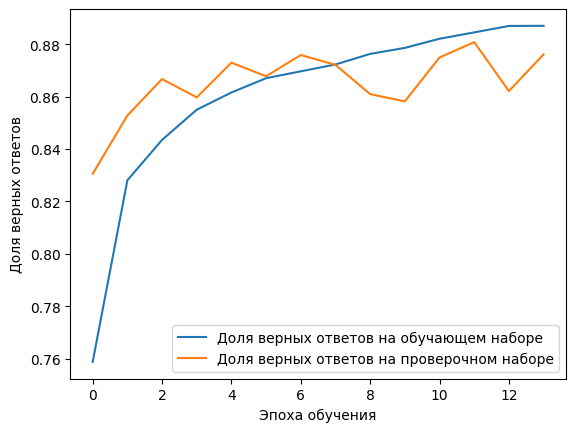

In [14]:
scores = model_2.evaluate(x_test_r,
                        y_test_r,
                        verbose=1
                        )
print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')
#Визуализация качества обучения
# Визуализация точности на обучающей выборке

plt.plot(history_2.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')

# Визуализация точности на проверочной выборке
plt.plot(history_2.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенды
plt.legend()

# Вывод графика
plt.show()

# Архитектура 3

In [15]:
#Архитектура 3

model_3 = Sequential()

model_3.add(Dense(512, input_dim=784, activation='relu'))
model_3.add(Dense(256, activation='relu'))
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(10, activation='softmax'))

model_3.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

# Вывод структуры модели
print(model_3.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

None


In [16]:
# Обучение нейронной сети
history_3 = model_3.fit(x_train_r,
                    y_train_r,
                    batch_size=8,
                    epochs=14,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7723 - loss: 0.6273 - val_accuracy: 0.8553 - val_loss: 0.4024
Epoch 2/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8550 - loss: 0.3930 - val_accuracy: 0.8724 - val_loss: 0.3705
Epoch 3/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8670 - loss: 0.3554 - val_accuracy: 0.8659 - val_loss: 0.3748
Epoch 4/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8775 - loss: 0.3285 - val_accuracy: 0.8712 - val_loss: 0.3508
Epoch 5/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8865 - loss: 0.3082 - val_accuracy: 0.8669 - val_loss: 0.3616
Epoch 6/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8913 - loss: 0.2971 - val_accuracy: 0.8847 - val_loss: 0.3249
Epoch 7/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8952 - loss: 0.2809 - val_accuracy: 0.8712 - val_loss: 0.3603
Epoch 8/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8990 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8503 - loss: 80.2953
Процент верных ответов на тестовых данных: 85.0 %


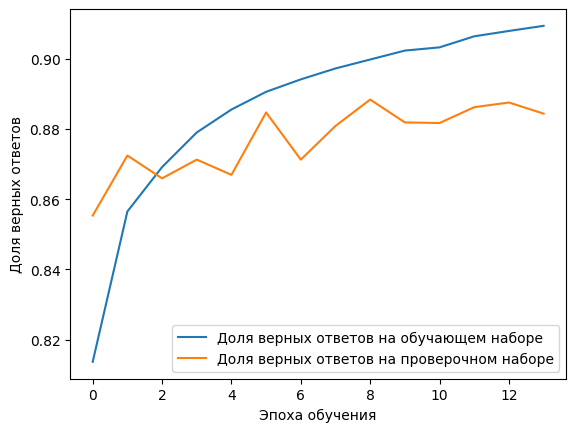

In [17]:
scores = model_3.evaluate(x_test_r,
                        y_test_r,
                        verbose=1
                        )
print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')
#Визуализация качества обучения
# Визуализация точности на обучающей выборке

plt.plot(history_3.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')

# Визуализация точности на проверочной выборке
plt.plot(history_3.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенды
plt.legend()

# Вывод графика
plt.show()

#Архитектура 4

In [18]:
model_4 = Sequential()
model_4.add(Dense(512, input_dim=784, activation='relu'))
model_4.add(Dropout(0.2))
model_4.add(Dense(256, activation='relu'))
model_4.add(Dropout(0.2))
model_4.add(Dense(128, activation='relu'))
model_4.add(Dropout(0.2))
model_4.add(Dense(10, activation='softmax'))

model_4.compile(loss='categorical_crossentropy',
                optimizer=Adam(0.001),
                metrics=['accuracy'])
# Вывод структуры модели
print(model_4.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

None


In [19]:
# Обучение нейронной сети
history_4 = model_4.fit(x_train_r,
                    y_train_r,
                    batch_size=8,
                    epochs=14,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.7349 - loss: 0.7325 - val_accuracy: 0.8191 - val_loss: 0.4838
Epoch 2/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.8335 - loss: 0.4680 - val_accuracy: 0.8524 - val_loss: 0.4035
Epoch 3/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8443 - loss: 0.4309 - val_accuracy: 0.8419 - val_loss: 0.4243
Epoch 4/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8581 - loss: 0.4068 - val_accuracy: 0.8667 - val_loss: 0.3606
Epoch 5/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8611 - loss: 0.3968 - val_accuracy: 0.8687 - val_loss: 0.3696
Epoch 6/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8614 - loss: 0.3887 - val_accuracy: 0.8618 - val_loss: 0.3829
Epoch 7/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.8641 - loss: 0.3788 - val_accuracy: 0.8713 - val_loss: 0.3697
Epoch 8/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8685 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8612 - loss: 50.8619
Процент верных ответов на тестовых данных: 86.0 %


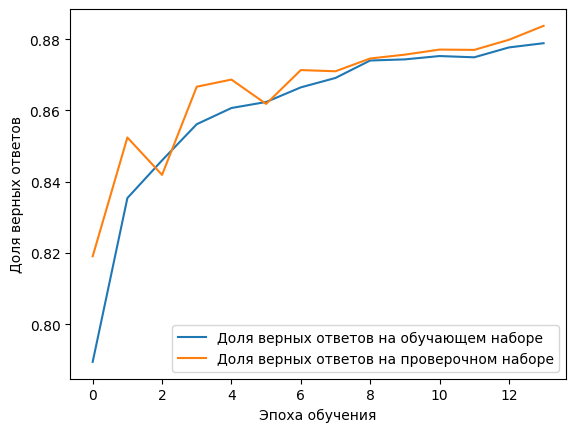

In [20]:
scores = model_4.evaluate(x_test_r,
                        y_test_r,
                        verbose=1
                        )
print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')
#Визуализация качества обучения
# Визуализация точности на обучающей выборке

plt.plot(history_4.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')

# Визуализация точности на проверочной выборке
plt.plot(history_4.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенды
plt.legend()

# Вывод графика
plt.show()

#Архитектура 5

In [21]:
model_5 = Sequential()
model_5.add(Dense(512, input_dim=784))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dense(256))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dense(128))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dense(10, activation='softmax'))

model_5.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Вывод структуры модели
print(model_5.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 571,018 (2.18 MB)

 Trainable params: 569,226 (2.17 MB)

 Non-trainable params: 1,792 (7.00 KB)

None


In [22]:
# Обучение нейронной сети
history_5 = model_5.fit(x_train_r,
                    y_train_r,
                    batch_size=8,
                    epochs=14,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.7371 - loss: 0.7542 - val_accuracy: 0.8329 - val_loss: 0.4546
Epoch 2/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.8229 - loss: 0.4901 - val_accuracy: 0.8562 - val_loss: 0.3875
Epoch 3/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8406 - loss: 0.4322 - val_accuracy: 0.8752 - val_loss: 0.3463
Epoch 4/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8523 - loss: 0.4050 - val_accuracy: 0.8729 - val_loss: 0.3423
Epoch 5/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.8647 - loss: 0.3712 - val_accuracy: 0.8543 - val_loss: 0.3851
Epoch 6/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.8693 - loss: 0.3540 - val_accuracy: 0.8871 - val_loss: 0.3170
Epoch 7/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8716 - loss: 0.3450 - val_accuracy: 0.8845 - val_loss: 0.3193
Epoch 8/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8810 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7696 - loss: 141.0049
Процент верных ответов на тестовых данных: 77.0 %


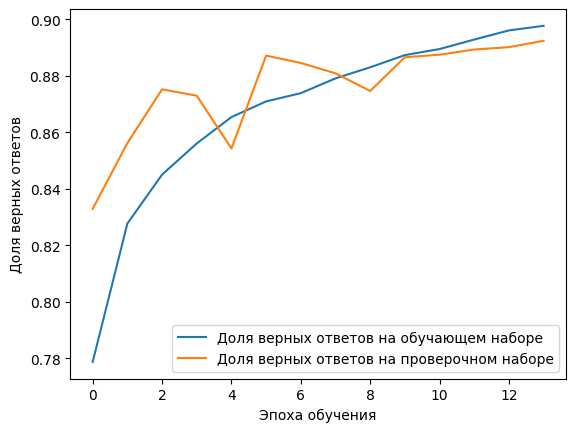

In [23]:
scores = model_5.evaluate(x_test_r,
                        y_test_r,
                        verbose=1
                        )
print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')
#Визуализация качества обучения
# Визуализация точности на обучающей выборке

plt.plot(history_5.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')

# Визуализация точности на проверочной выборке
plt.plot(history_5.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенды
plt.legend()

# Вывод графика
plt.show()

#Архитектура 6

In [24]:
model_6 = Sequential()
model_6.add(Dense(512, input_dim=784))
model_6.add(BatchNormalization())
model_6.add(Activation('relu'))
model_6.add(Dropout(0.2))
model_6.add(Dense(256))
model_6.add(BatchNormalization())
model_6.add(Activation('relu'))
model_6.add(Dropout(0.2))
model_6.add(Dense(128))
model_6.add(BatchNormalization())
model_6.add(Activation('relu'))
model_6.add(Dropout(0.2))
model_6.add(Dense(10, activation='softmax'))

model_6.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Вывод структуры модели
print(model_6.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 571,018 (2.18 MB)

 Trainable params: 569,226 (2.17 MB)

 Non-trainable params: 1,792 (7.00 KB)

None


In [25]:
# Обучение нейронной сети
history_6 = model_6.fit(x_train_r,
                    y_train_r,
                    batch_size=8,
                    epochs=14,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.7028 - loss: 0.8587 - val_accuracy: 0.8313 - val_loss: 0.4567
Epoch 2/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.8039 - loss: 0.5636 - val_accuracy: 0.8529 - val_loss: 0.3972
Epoch 3/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8159 - loss: 0.5091 - val_accuracy: 0.8562 - val_loss: 0.3817
Epoch 4/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8357 - loss: 0.4579 - val_accuracy: 0.8642 - val_loss: 0.3625
Epoch 5/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8405 - loss: 0.4447 - val_accuracy: 0.8724 - val_loss: 0.3462
Epoch 6/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8480 - loss: 0.4191 - val_accuracy: 0.8727 - val_loss: 0.3514
Epoch 7/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8523 - loss: 0.4051 - val_accuracy: 0.8792 - val_loss: 0.3305
Epoch 8/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8566 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8062 - loss: 79.7552
Процент верных ответов на тестовых данных: 81.0 %


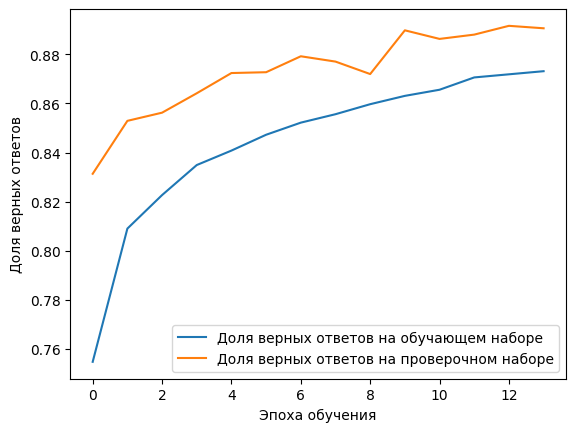

In [26]:
scores = model_6.evaluate(x_test_r,
                        y_test_r,
                        verbose=1
                        )
print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')
#Визуализация качества обучения
# Визуализация точности на обучающей выборке

plt.plot(history_6.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')

# Визуализация точности на проверочной выборке
plt.plot(history_6.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенды
plt.legend()

# Вывод графика
plt.show()

#Архитектура 7

In [27]:
model_7 = Sequential()
model_7.add(Dense(1024, input_dim=784, activation='relu'))
model_7.add(Dense(1024, input_dim=784))
model_7.add(BatchNormalization())
model_7.add(Activation('relu'))
model_7.add(Dropout(0.3))
model_7.add(Dense(512))
model_7.add(BatchNormalization())
model_7.add(Activation('relu'))
model_7.add(Dropout(0.3))
model_7.add(Dense(256))
model_7.add(BatchNormalization())
model_7.add(Activation('relu'))
model_7.add(Dropout(0.3))
model_7.add(Dense(128))
model_7.add(BatchNormalization())
model_7.add(Activation('relu'))
model_7.add(Dropout(0.3))
model_7.add(Dense(10, activation='softmax'))

model_7.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Вывод структуры модели
print(model_7.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,551,434 (9.73 MB)

 Trainable params: 2,547,594 (9.72 MB)

 Non-trainable params: 3,840 (15.00 KB)

None


In [28]:
# Обучение нейронной сети
history_7 = model_7.fit(x_train_r,
                    y_train_r,
                    batch_size=8,
                    epochs=14,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.6665 - loss: 0.9708 - val_accuracy: 0.8305 - val_loss: 0.4523
Epoch 2/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.8096 - loss: 0.5589 - val_accuracy: 0.8543 - val_loss: 0.3841
Epoch 3/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.8314 - loss: 0.4845 - val_accuracy: 0.8699 - val_loss: 0.3706
Epoch 4/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.8457 - loss: 0.4394 - val_accuracy: 0.8621 - val_loss: 0.3702
Epoch 5/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.8562 - loss: 0.4125 - val_accuracy: 0.8774 - val_loss: 0.3355
Epoch 6/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.8632 - loss: 0.3916 - val_accuracy: 0.8675 - val_loss: 0.3764
Epoch 7/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.8727 - loss: 0.3644 - val_accuracy: 0.8720 - val_loss: 0.3413
Epoch 8/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.8768 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8575 - loss: 78.5246
Процент верных ответов на тестовых данных: 85.0 %


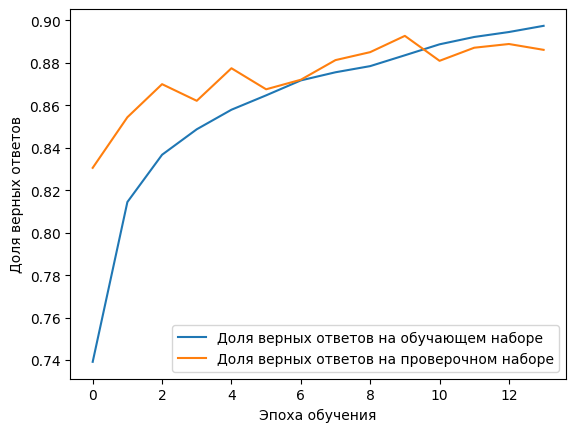

In [29]:
scores = model_7.evaluate(x_test_r,
                        y_test_r,
                        verbose=1
                        )
print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')
#Визуализация качества обучения
# Визуализация точности на обучающей выборке

plt.plot(history_7.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')

# Визуализация точности на проверочной выборке
plt.plot(history_7.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенды
plt.legend()

# Вывод графика
plt.show()

#Архитектура 8

In [30]:
model_8 = Sequential()
model_8.add(Dense(512, input_dim=784, activation='relu'))
model_8.add(Dense(512, input_dim=784))
model_8.add(BatchNormalization())
model_8.add(Activation('relu'))
model_8.add(Dense(256))
model_8.add(BatchNormalization())
model_8.add(Activation('relu'))
model_8.add(Dense(128))
model_8.add(BatchNormalization())
model_8.add(Activation('relu'))
model_8.add(Dense(10, activation='softmax'))
model_8.compile(loss='categorical_crossentropy',
                optimizer=Adadelta(),
                metrics=['accuracy'])

# Вывод структуры модели
print(model_8.summary())

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833,674 (3.18 MB)

 Trainable params: 831,882 (3.17 MB)

 Non-trainable params: 1,792 (7.00 KB)

None


In [31]:
# Обучение нейронной сети
history_8 = model_8.fit(x_train_r,
                    y_train_r,
                    batch_size=8,
                    epochs=14,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.2031 - loss: 2.2713 - val_accuracy: 0.6026 - val_loss: 1.2581
Epoch 2/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.5564 - loss: 1.3946 - val_accuracy: 0.7045 - val_loss: 0.9463
Epoch 3/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.6425 - loss: 1.1526 - val_accuracy: 0.7402 - val_loss: 0.8125
Epoch 4/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.6760 - loss: 1.0432 - val_accuracy: 0.7614 - val_loss: 0.7394
Epoch 5/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.6984 - loss: 0.9629 - val_accuracy: 0.7750 - val_loss: 0.6833
Epoch 6/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.7132 - loss: 0.9135 - val_accuracy: 0.7853 - val_loss: 0.6471
Epoch 7/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.7314 - loss: 0.8605 - val_accuracy: 0.7940 - val_loss: 0.6133
Epoch 8/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.7387 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5035 - loss: 179.0930
Процент верных ответов на тестовых данных: 50.0 %


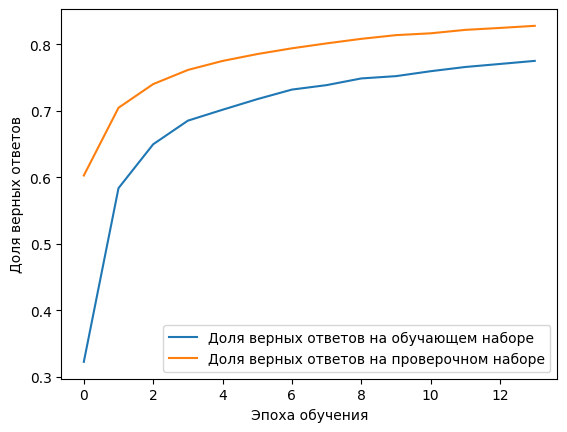

In [32]:
scores = model_8.evaluate(x_test_r,
                        y_test_r,
                        verbose=1
                        )
print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')
#Визуализация качества обучения
# Визуализация точности на обучающей выборке

plt.plot(history_8.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')

# Визуализация точности на проверочной выборке
plt.plot(history_8.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенды
plt.legend()

# Вывод графика
plt.show()

#Архитектура 9

In [33]:
model_9 = Sequential()
model_9.add(Dense(512, input_dim=784))
model_9.add(BatchNormalization())
model_9.add(Activation('tanh'))
model_9.add(Dropout(0.25))
model_9.add(Dense(256))
model_9.add(BatchNormalization())
model_9.add(Activation('tanh'))
model_9.add(Dropout(0.25))
model_9.add(Dense(128))
model_9.add(BatchNormalization())
model_9.add(Activation('tanh'))
model_9.add(Dropout(0.25))
model_9.add(Dense(10, activation='softmax'))
model_9.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])
# Вывод структуры модели
print(model_9.summary())

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 571,018 (2.18 MB)

 Trainable params: 569,226 (2.17 MB)

 Non-trainable params: 1,792 (7.00 KB)

None


In [34]:
# Обучение нейронной сети
history_9 = model_9.fit(x_train_r,
                    y_train_r,
                    batch_size=8,
                    epochs=14,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.7210 - loss: 0.8230 - val_accuracy: 0.8370 - val_loss: 0.4511
Epoch 2/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.7998 - loss: 0.5803 - val_accuracy: 0.8459 - val_loss: 0.4314
Epoch 3/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8136 - loss: 0.5353 - val_accuracy: 0.8574 - val_loss: 0.3913
Epoch 4/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8250 - loss: 0.5006 - val_accuracy: 0.8607 - val_loss: 0.3763
Epoch 5/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8329 - loss: 0.4673 - val_accuracy: 0.8552 - val_loss: 0.4024
Epoch 6/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8401 - loss: 0.4597 - val_accuracy: 0.8626 - val_loss: 0.3748
Epoch 7/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8450 - loss: 0.4429 - val_accuracy: 0.8709 - val_loss: 0.3553
Epoch 8/14
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.8495 - loss: 0

In [ ]:
scores = model_9.evaluate(x_test_r,
                        y_test_r,
                        verbose=1
                        )
print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')
#Визуализация качества обучения
# Визуализация точности на обучающей выборке

plt.plot(history_9.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')

# Визуализация точности на проверочной выборке
plt.plot(history_9.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенды
plt.legend()

# Вывод графика
plt.show()

In [38]:
import pandas as pd

# Собираем все модели и их истории обучения в списки
models = [model, model_2, model_3, model_4, model_5, model_6, model_7, model_8, model_9]
histories = [history, history_2, history_3, history_4, history_5,
             history_6, history_7, history_8, history_9]

# Подготовка данных для таблицы
results = []

# Проходим по всем моделям и историям
for idx, (model, history) in enumerate(zip(models, histories), 1):
    # Получаем метрики из истории обучения
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]

    # Оцениваем модель на тестовых данных
    test_loss, test_acc = model.evaluate(x_test_r, y_test_r, verbose=0)

    # Собираем информацию о модели
    results.append({
        'Модель': f'Модель {idx}',
        'Точность обучения': f"{round(train_acc*100, 2)}%",
        'Точность валидации': f"{round(val_acc*100, 2)}%",
        'Точность теста': f"{round(test_acc*100, 2)}%",
        'Параметры': model.count_params(),
        'Слои': ', '.join([layer.__class__.__name__ for layer in model.layers])
    })

# Создаем DataFrame с результатами
df = pd.DataFrame(results)

# Добавляем стиль для лучшей визуализации
styled_df = df.style \
    .set_caption('Сравнение моделей') \
    .set_properties(**{'text-align': 'left'})

# Отображаем таблицу
styled_df

,Модель,Точность обучения,Точность валидации,Точность теста,Параметры,Слои
0,Модель 1,86.37%,88.06%,81.78%,571018,"Dense, BatchNormalization, Activation, Dropout, Dense, BatchNormalization, Activation, Dropout, Dense, BatchNormalization, Activation, Dropout, Dense"
1,Модель 2,88.7%,87.61%,49.02%,50170,"Dense, Dense, Activation, Dropout, Dense, Activation, Dense"
2,Модель 3,90.93%,88.43%,84.55%,567434,"Dense, Dense, Dense, Dense"
3,Модель 4,87.89%,88.38%,85.76%,567434,"Dense, Dropout, Dense, Dropout, Dense, Dropout, Dense"
4,Модель 5,89.76%,89.23%,76.69%,571018,"Dense, BatchNormalization, Activation, Dense, BatchNormalization, Activation, Dense, BatchNormalization, Activation, Dense"
5,Модель 6,87.32%,89.07%,80.79%,571018,"Dense, BatchNormalization, Activation, Dropout, Dense, BatchNormalization, Activation, Dropout, Dense, BatchNormalization, Activation, Dropout, Dense"
6,Модель 7,89.74%,88.61%,85.45%,2551434,"Dense, Dense, BatchNormalization, Activation, Dropout, Dense, BatchNormalization, Activation, Dropout, Dense, BatchNormalization, Activation, Dropout, Dense, BatchNormalization, Activation, Dropout, Dense"
7,Модель 8,77.51%,82.78%,50.21%,833674,"Dense, Dense, BatchNormalization, Activation, Dense, BatchNormalization, Activation, Dense, BatchNormalization, Activation, Dense"
8,Модель 9,86.37%,88.06%,81.78%,571018,"Dense, BatchNormalization, Activation, Dropout, Dense, BatchNormalization, Activation, Dropout, Dense, BatchNormalization, Activation, Dropout, Dense"
